/home/lorenzo/miniconda3/envs/datas/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error: 1.6680002449278108
Root Mean Squared Error: 1.2915108380992437


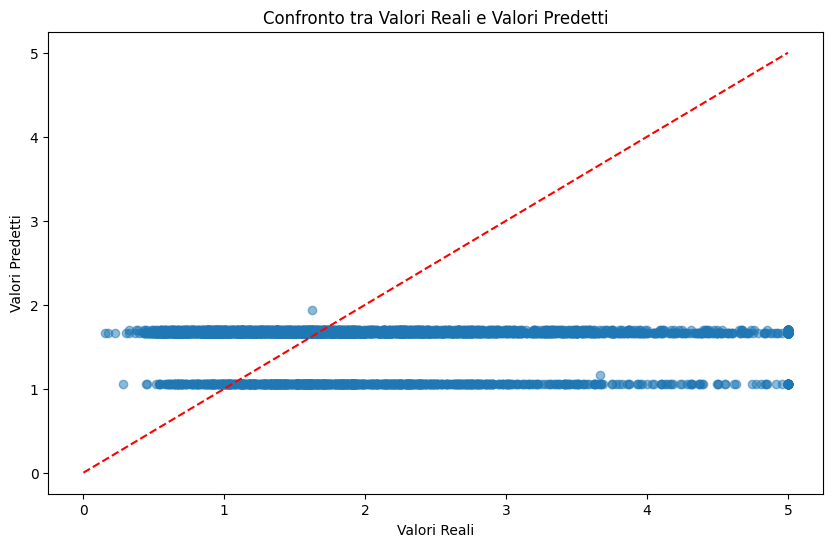

In [9]:
# Importare le librerie necessarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Caricare il dataset California Housing
california = fetch_california_housing()

# Creare un DataFrame con i dati
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applicare la normalizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Utilizzare KNN per la regressione
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Fare previsioni sul test set
y_pred = knn.predict(X_test_scaled)

# Valutare le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Visualizzare un grafico di confronto tra i valori reali e quelli predetti
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto tra Valori Reali e Valori Predetti")
plt.plot([0, 5], [0, 5], '--r')
plt.show()


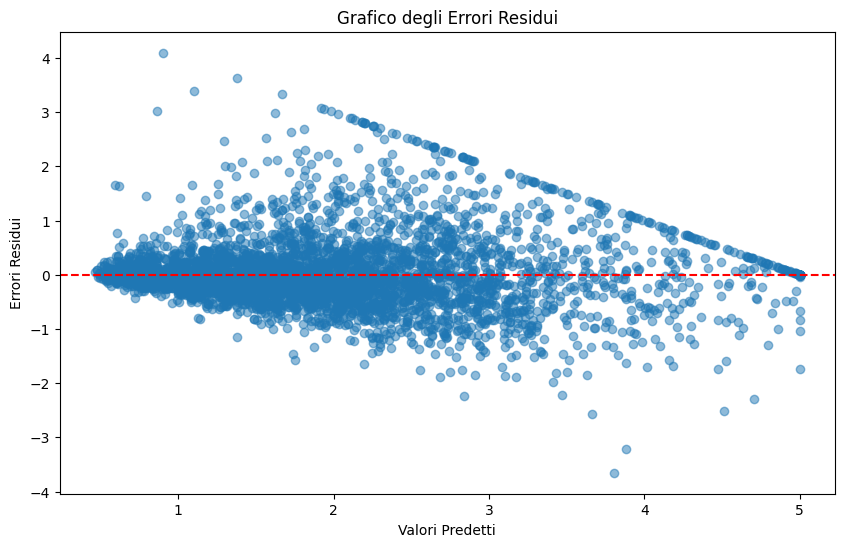

In [6]:
# Calcolare gli errori residui
residuals = y_test - y_pred

# Visualizzare il grafico degli errori residui
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valori Predetti")
plt.ylabel("Errori Residui")
plt.title("Grafico degli Errori Residui")
plt.show()

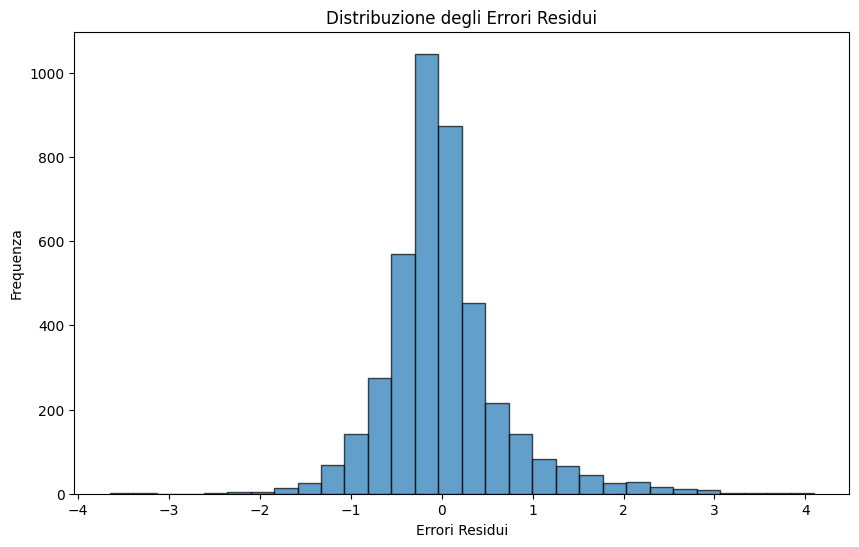

In [7]:
# Visualizzare la distribuzione degli errori residui
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Errori Residui")
plt.ylabel("Frequenza")
plt.title("Distribuzione degli Errori Residui")
plt.show()

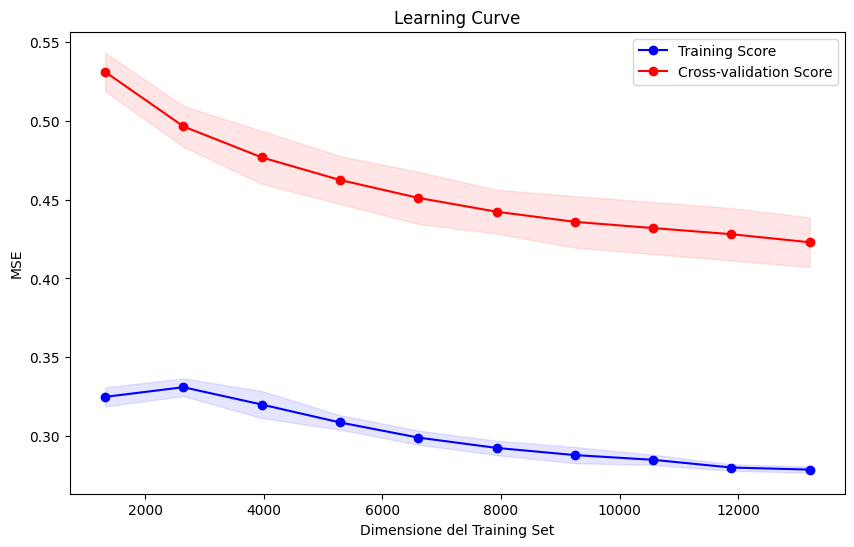

In [10]:
from sklearn.model_selection import learning_curve

# Generare le learning curves
train_sizes, train_scores, test_scores = learning_curve(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calcolare media e deviazione standard degli errori
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Visualizzare le learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label="Cross-validation Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.xlabel("Dimensione del Training Set")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

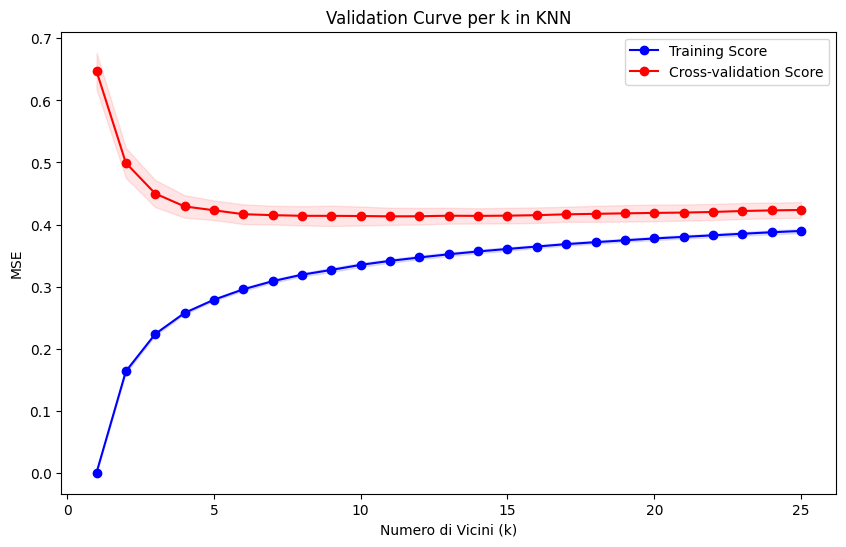

In [11]:
from sklearn.model_selection import validation_curve

# Generare le validation curves
param_range = np.arange(1, 26)
train_scores, test_scores = validation_curve(knn, X_train_scaled, y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring='neg_mean_squared_error')

# Calcolare media e deviazione standard degli errori
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Visualizzare le validation curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, 'o-', color='b', label="Training Score")
plt.plot(param_range, test_scores_mean, 'o-', color='r', label="Cross-validation Score")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.xlabel("Numero di Vicini (k)")
plt.ylabel("MSE")
plt.title("Validation Curve per k in KNN")
plt.legend(loc="best")
plt.show()